<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

## Загрузка данных

In [2]:
data = pd.read_csv('/datasets/insurance.csv')
data

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [4]:
data[data.duplicated()]

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
281,1,39.0,48100.0,1,0
488,1,24.0,32900.0,1,0
513,0,31.0,37400.0,2,0
718,1,22.0,32600.0,1,0
785,0,20.0,35800.0,0,0
...,...,...,...,...,...
4793,1,24.0,37800.0,0,0
4902,1,35.0,38700.0,1,0
4935,1,19.0,32700.0,0,0
4945,1,21.0,45800.0,0,0


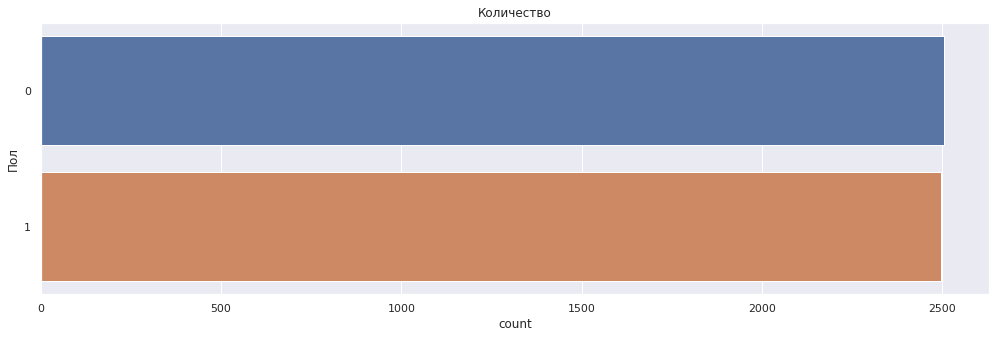

In [5]:
sns.set()
fig, ax = plt.subplots(figsize=(17, 5))

sns.countplot(data=data, y='Пол')
ax.set_title('Пол');
ax.set_title('Количество');

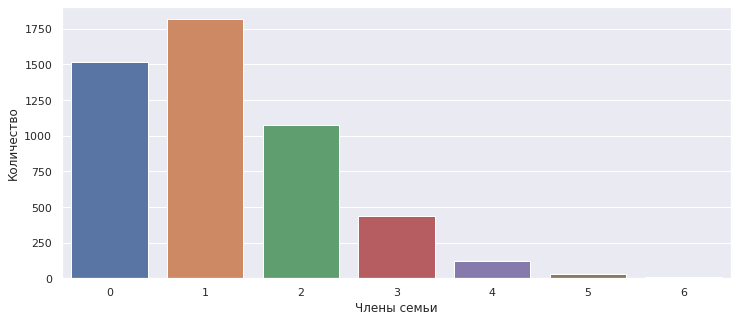

In [6]:
sns.set()
fig, ax = plt.subplots(figsize=(12, 5))

sns.countplot(x='Члены семьи', data=data)
plt.ylabel('Количество');

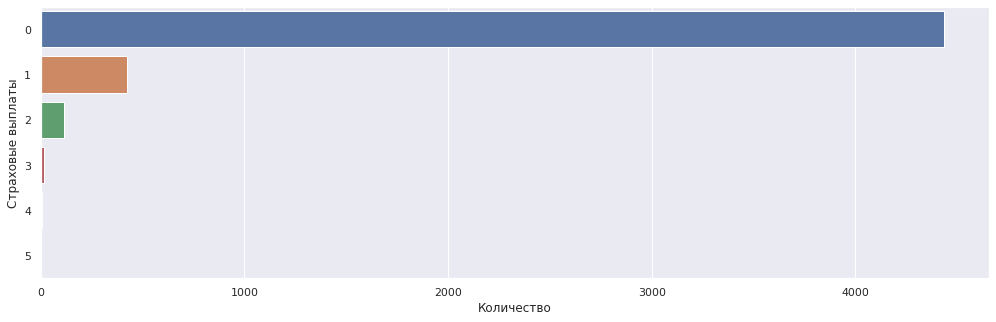

In [7]:
sns.set()
fig, ax = plt.subplots(figsize=(17, 5))

sns.countplot(data=data, y='Страховые выплаты')
plt.xlabel('Количество');

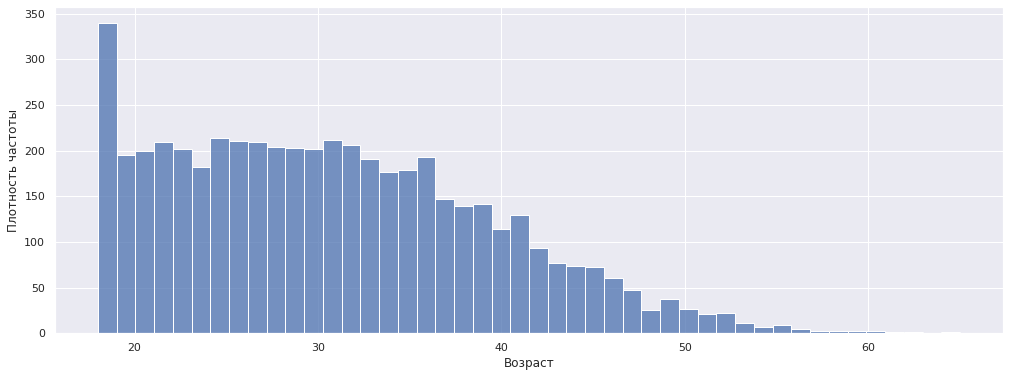

In [8]:
sns.set()
fig, ax = plt.subplots(figsize=(17, 6))

sns.histplot(data['Возраст'], bins=len(data['Возраст'].unique()))
plt.ylabel('Плотность частоты');

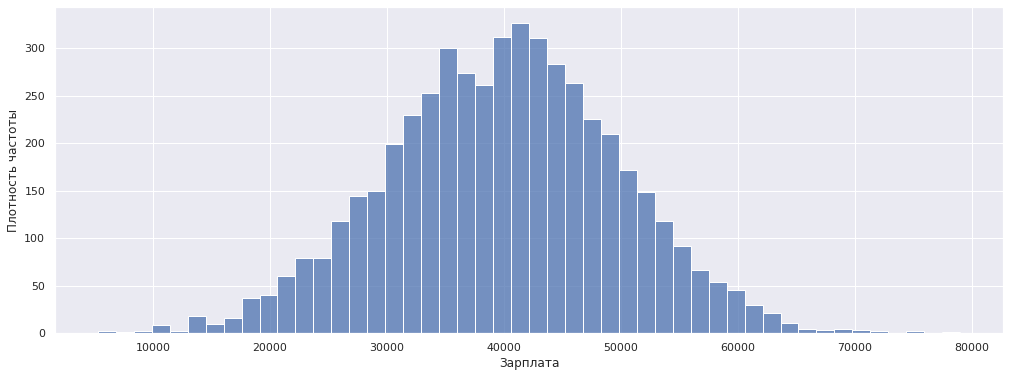

In [9]:
sns.set()
fig, ax = plt.subplots(figsize=(17, 6))

sns.histplot(data['Зарплата'])
plt.ylabel('Плотность частоты');

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
На графики стоит добавить заголовки 

Разделим данные на признаки и целевой признак.

In [10]:
features = data.drop('Страховые выплаты', axis=1)

In [11]:
target = data['Страховые выплаты']

### Вывод

Данные нормальные и не требуют дальнейшей предобработки.

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** 

$$
w' = P^{-1} w
$$
$$
a=a'
$$
$$
MSE=MSE'
$$

Качество линейной регрессии не изменится.

**Обоснование:** 

$$
w' = ((XP)^T XP)^{-1} (XP)^T
$$
$$
w' = (P^T X^T XP)^{-1} (XP)^T y
$$
$$
w' = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$
$$
w' = P^{-1} (X^T X)^{-1} E X^T y
$$

$$
w' = P^{-1} ((X^T X)^{-1} X^T y)
$$
$$
w = (X^T X)^{-1} X^T y
$$

$$
w' = P^{-1} w
$$

$$
a' = (XP) P^{-1} w
$$
$$
a' = Xw
$$
$$
a' = a
$$

$$
MSE = n^{-1} \displaystyle\sum_{i=1}^{n} (y-a)^2
$$
$$
MSE' = n^{-1} \displaystyle\sum_{i=1}^{n} (y-a')^2\
$$

$$
a' = a \Rightarrow MSE' = MSE
$$

## Алгоритм преобразования

**Алгоритм**

Создадим две матрицы: одна будет случайной для кодирования, другая будет для декодирования и обратной первой.

*Матрица кодирования*:
- Матрица должна быть обратимой (детерминатор не равен нулю)
- Матрица должна быть квадратной
- Размер матрицы соответствует кол-ву признаков

*Матрица декодирования*:
- Обратная первой матрице 

**Обоснование**
$$
a' = XPw'
$$
$$
a' = XP P^{-1} w
$$
$$
a' = XEw
$$
$$
a' = Xw = a
$$


## Проверка алгоритма

Создадим две случайные квадратные матрицы, обратные друг другу. При умножении на одну признаки будут кодироваться, а для получения первоначальных признаков достаточно умножить на обратную матрицу.

In [12]:
def cod(n):  
    det = 0
    while det == 0:
        matrix = np.random.normal(size = (n, n))
        det = np.linalg.det(matrix) 
    matrix_inv = np.linalg.inv(matrix)
    return matrix, matrix_inv

In [13]:
key, key_inv = cod(features.shape[1])

In [14]:
features_cod = features @ key

In [15]:
features_cod.head()

,0,1,2,3
0,22342.520759,31211.568677,-6085.616792,-6684.554218
1,17127.949710,23924.085098,-4659.559027,-5121.039722
2,9469.619485,13223.639752,-2574.433550,-2830.424947
3,18770.016498,26229.475811,-5118.117561,-5619.640409
4,11763.460956,16429.118698,-3201.497295,-3517.532474


Обучим две модели, одна будет обучена на оригинальных данных, другая на преобразованных и сравним их.

In [16]:
model = LinearRegression()
model.fit(features, target)
predictions = model.predict(features)
print('R2:', r2_score(target, predictions))

R2: 0.4249455028666801


In [17]:
model_cod = LinearRegression()
model_cod.fit(features_cod, target)
predictions_cod = model.predict(features)
print('R2:', r2_score(target, predictions_cod))

R2: 0.4249455028666801


In [18]:
print('Не сходятся:', predictions.shape[0] - sum(predictions_cod == predictions))

Не сходятся: 0


Метрика R2 сходится на обеих моделях, предсказывают модели тоже похоже одинаково.

In [19]:
features_cod.head()

,0,1,2,3
0,22342.520759,31211.568677,-6085.616792,-6684.554218
1,17127.949710,23924.085098,-4659.559027,-5121.039722
2,9469.619485,13223.639752,-2574.433550,-2830.424947
3,18770.016498,26229.475811,-5118.117561,-5619.640409
4,11763.460956,16429.118698,-3201.497295,-3517.532474


In [20]:
features_decod = features_cod @ key_inv
features_decod = np.around(features_decod)

features_decod.columns = features.columns.tolist()
features_decod = abs(features_decod)

In [21]:
(features_decod == features).sum()

Пол            5000
Возраст        5000
Зарплата       4960
Члены семьи    5000
dtype: int64

Похоже при округлении не все значения зарплаты вернулись к первоначальному значению.

In [22]:
pd.DataFrame([
    features_decod[features_decod['Зарплата'] != features['Зарплата']]['Зарплата'],
    features[features_decod['Зарплата'] != features['Зарплата']]['Зарплата']]).T

,Зарплата,Зарплата
80,32700.0,32700.0
159,64900.0,64900.0
313,32700.0,32700.0
392,32700.0,32700.0
448,32700.0,32700.0
772,65100.0,65100.0
820,32200.0,32200.0
872,32200.0,32200.0
911,32200.0,32200.0
963,64100.0,64100.0


На первый взгляд значения одинаковы.

In [23]:
features_decod.loc[80, 'Зарплата'], features.loc[80, 'Зарплата']

(32700.0, 32700.000000000004)

Из-за округления похоже потерялось немного информации, но это в пределах допустимого, потому будем считать, что данные восстановились полностью.

### Вывод

Качество метрики R2 для матриц до преобразования и после равны.